# 1.import necessary libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.import dataset

In [3]:
df=pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# 3.select the features to cluster


Annual Income (k$)	Spending Score (1-100)

In [37]:
x=df.iloc[:,3:].values

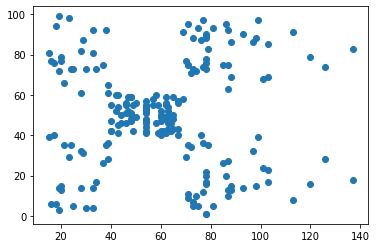

In [38]:
plt.scatter(x[:,0],x[:,1])

# 4.find optimal number of clusters---elbow method

wcss=sumof the distances of observations from cluster centroids


In [7]:
from  sklearn.cluster import KMeans


In [8]:
from sklearn.cluster import KMeans
#intialise the list to store wcss values
wcss=[]
# Try different values of K (from 1 to 10) and calculate WCSS for each K
#K-Means++ to Choose Initial Cluster Centroids for K-Means Clustering
for k in range(1,11): #k= 1 to 10
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\adarsha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30259.657207285458,
 25095.703209997544,
 21830.04197804944,
 20736.67993892413]

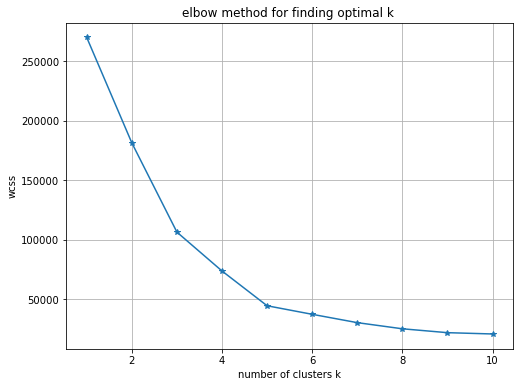

In [42]:
#plot the elbow curve 
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="*")
plt.title("elbow method for finding optimal k ")
plt.xlabel("number of clusters k")
plt.ylabel("wcss")
plt.grid()
plt.show()

# 5.train the model on the dataset using the optimal cluster k value

In [11]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [12]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [28]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 6.Visulalize the clusters

In [30]:
#how many no.of datapoints belonging to 0 th cluster ffrom 0 th column anuual income
x[y_kmeans==0,0]

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [31]:
#how many no.of datapoints blonging to 2 nd cluster from 1 st column spending score
x[y_kmeans==2,1]

array([91, 77, 95, 75, 75, 71, 88, 73, 72, 93, 87, 97, 74, 90, 88, 76, 89,
       78, 73, 83, 93, 75, 95, 63, 75, 92, 86, 69, 90, 86, 88, 97, 68, 85,
       69, 91, 79, 74, 83], dtype=int64)

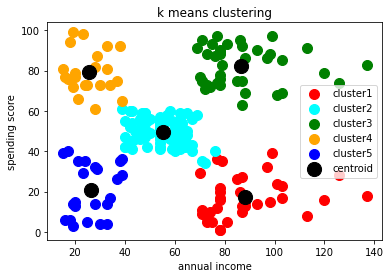

In [32]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],color="red",s=100,label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],color="cyan",s=100,label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],color="green",s=100,label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],color="orange",s=100,label="cluster4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],color="blue",s=100,label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",s=200,label="centroid")
plt.title("k means clustering")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()

In [43]:
kmeans.predict([[15,  39]])

array([4])